In [1]:
# importing th libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# loading the dataset(winequalityN(1).csv)
data1=pd.read_csv("/content/winequalityN.csv")
data1

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [3]:
# getting the info about the dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
# knowing the data types of the dataset
data1.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [5]:
#Count of duplicated rows
data1[data1.duplicated()].shape

(1168, 13)

In [6]:
# droping the duplicates from the dataset
data_cleaned1=data1.drop_duplicates()

In [7]:
# to print the dataset after droping the duplicates
data_cleaned1.shape
data_cleaned1

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
6     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
6         0.045                 30.0                 136.0  0.99490  3.18   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
6          0.47      9.6        6  
...         ...      ...      ...  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[5329 rows x 13 columns]

In [8]:
# provides a summary statistics of the dataset
data_cleaned1.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5319.000000       5321.000000  5326.000000     5327.000000   
mean        7.216573          0.344123     0.318738        5.053839   
std         1.319194          0.168228     0.147116        4.504005   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5327.000000          5329.000000           5329.000000  5329.000000   
mean      0.056668            30.060143            114.189341     0.994536   
std       0.036845            17.815588             56.781422     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             75.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994640   
75%       0.066000            41.000000            154.000000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  5320.000000  5325.000000  5329.000000  5329.000000  
mean      3.224434     0.533268    10.548539     5.796022  
std       0.160275     0.149724     1.186134     0.879922  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.400000     6.000000  
75%       3.330000     0.600000    11.400000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [9]:
# the columns that are present in the winequality dataset
data_cleaned1.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [10]:
# to know the total null values that are present
data_cleaned1.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [11]:
# Calculate the percentage of missing values for each column
missing_percentages = data_cleaned1.isnull().mean() * 100

In [12]:
# Create a DataFrame for the heatmap
missing_percentages_df = missing_percentages.to_frame().T

T is the transpose method for a pandas DataFrame. Transposing swaps the rows and columns of the DataFrame.

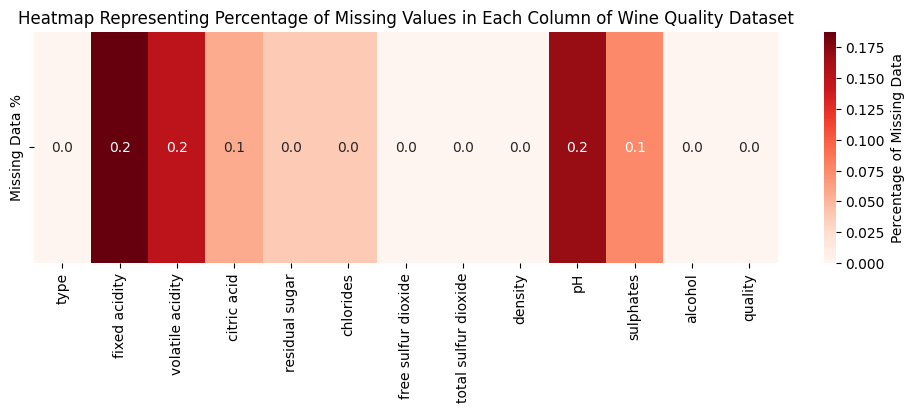

In [13]:
# Plotting
plt.figure(figsize=(12, 3))  # Adjust the figure size as necessary
ax = sns.heatmap(missing_percentages_df, annot=True, fmt=".1f", cmap='Reds', cbar_kws={'label': 'Percentage of Missing Data'})
ax.set_yticklabels(['Missing Data %'])
plt.title('Heatmap Representing Percentage of Missing Values in Each Column of Wine Quality Dataset')
plt.show()

exp:-

Overall, this heatmap allows for a quick visual assessment of missing data patterns in the wine quality dataset. It helps identify columns with a high percentage of missing values, which may require further investigation or imputation before proceeding with data analysis or modeling.

In [14]:
data_cleaned1.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [15]:
data_cleaned1.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5319.000000       5321.000000  5326.000000     5327.000000   
mean        7.216573          0.344123     0.318738        5.053839   
std         1.319194          0.168228     0.147116        4.504005   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5327.000000          5329.000000           5329.000000  5329.000000   
mean      0.056668            30.060143            114.189341     0.994536   
std       0.036845            17.815588             56.781422     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             75.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994640   
75%       0.066000            41.000000            154.000000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  5320.000000  5325.000000  5329.000000  5329.000000  
mean      3.224434     0.533268    10.548539     5.796022  
std       0.160275     0.149724     1.186134     0.879922  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.400000     6.000000  
75%       3.330000     0.600000    11.400000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [16]:
# This code calculates the mean of the 'fixed acidity' column in the data_cleaned1 DataFrame and then prints the result.
mean=data_cleaned1['fixed acidity'].mean()
print(mean)

7.216572664034593


In [17]:
# This code replaces missing values in the 'fixed acidity' column of the data_cleaned1
data_cleaned1['fixed acidity']=data_cleaned1['fixed acidity'].fillna(mean)


<ipython-input-17-f612288b64d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned1['fixed acidity']=data_cleaned1['fixed acidity'].fillna(mean)


In [18]:
data_cleaned1

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
6     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
6         0.045                 30.0                 136.0  0.99490  3.18   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
6          0.47      9.6        6  
...         ...      ...      ...  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[5329 rows x 13 columns]

In [19]:
data_cleaned1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [20]:
# code calculates the mean of the 'volatile acidity' column in the data_cleaned1 DataFrame and then prints the result.
means=data_cleaned1['volatile acidity'].mean()
means

0.3441232850967863

In [21]:
# This code replaces missing values in the 'volatile acidity' column of the data_cleaned1
data_cleaned1['volatile acidity']=data_cleaned1['volatile acidity'].fillna(means)

<ipython-input-21-e29fb6917b1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned1['volatile acidity']=data_cleaned1['volatile acidity'].fillna(means)


In [22]:
data_cleaned1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             3
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [23]:
# code calculates the mean of the 'citric acid' column in the data_cleaned1 DataFrame
meanc=data_cleaned1['citric acid'].mean()
meanc

0.31873826511453246

In [24]:
# This code replaces missing values in the 'citric acid' column of the data_cleaned1
data_cleaned1['citric acid']=data_cleaned1['citric acid'].fillna(meanc)

<ipython-input-24-2c84f7a4cd1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned1['citric acid']=data_cleaned1['citric acid'].fillna(meanc)


In [25]:
data_cleaned1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          2
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [26]:
# code calculates the mean of the 'residual sugar' column in the data_cleaned1 DataFrame
meanr=data_cleaned1['residual sugar'].mean()
meanr

5.053838933733809

In [27]:
# This code replaces missing values in the 'residual sugar' column of the data_cleaned1
data_cleaned1['residual sugar']=data_cleaned1['residual sugar'].fillna(meanr)

<ipython-input-27-3b386c3e24b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned1['residual sugar']=data_cleaned1['residual sugar'].fillna(meanr)


In [28]:
data_cleaned1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               2
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [29]:


# code calculates the mean of the 'chlorides' column in the data_cleaned1 DataFrame
meancl=data_cleaned1['chlorides'].mean()
meancl

0.056668293598648396

In [30]:
# This code replaces missing values in the 'chlorides' column of the data_cleaned
data_cleaned1['chlorides']=data_cleaned1['chlorides'].fillna(meancl)

<ipython-input-30-8923e95a7abd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned1['chlorides']=data_cleaned1['chlorides'].fillna(meancl)


In [31]:

data_cleaned1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [32]:
# code calculates the mean of the 'pH' column in the data_cleaned1 DataFrame
meanp=data_cleaned1['pH'].mean()
meanp

3.2244342105263155

In [33]:
# This code replaces missing values in the 'pH' column of the data_cleaned
data_cleaned1['pH']=data_cleaned1['pH'].fillna(meanp)

<ipython-input-33-44a33feb48d3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned1['pH']=data_cleaned1['pH'].fillna(meanp)


In [34]:
data_cleaned1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               4
alcohol                 0
quality                 0
dtype: int64

In [35]:
# code calculates the mean of the 'sulphates' column in the data_cleaned1 DataFrame
meansl=data_cleaned1['sulphates'].mean()
meansl

0.5332676056338028

In [36]:
# This code replaces missing values in the 'sulphates' column of the data_cleaned
data_cleaned1['sulphates']=data_cleaned1['sulphates'].fillna(meansl)

<ipython-input-36-8c9d6f841183>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned1['sulphates']=data_cleaned1['sulphates'].fillna(meansl)


In [37]:
data_cleaned1.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [38]:
# dataset after cleaning the data
data_cleaned1

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
6     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
6         0.045                 30.0                 136.0  0.99490  3.18   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0      0.450000      8.8        6  
1      0.490000      9.5        6  
2      0.440000     10.1        6  
3      0.400000      9.9        6  
6      0.470000      9.6        6  
...         ...      ...      ...  
6491   0.820000      9.5        6  
6492   0.580000     10.5        5  
6493   0.533268     11.2        6  
6495   0.710000     10.2        5  
6496   0.660000     11.0        6  

[5329 rows x 13 columns]

# Logistic Regression Analysis

In [39]:
# Preprocessing the data
# Assuming 'quality' as the target variable
x = data_cleaned1.drop('quality', axis=1)
y = data_cleaned1['quality']

In [40]:
# Convert 'type' column to categorical and one-hot encode it
x = pd.get_dummies(x, columns=['type'], drop_first=True)

In [41]:
# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [43]:
# Predicting on the test set
y_pred = model.predict(x_test)

In [44]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.5590994371482176
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        45
           5       0.64      0.61      0.62       359
           6       0.52      0.76      0.62       455
           7       0.50      0.17      0.26       175
           8       0.00      0.00      0.00        23
           9       0.00      0.00      0.00         1

    accuracy                           0.56      1066
   macro avg       0.24      0.22      0.21      1066
weighted avg       0.52      0.56      0.52      1066

Confusion Matrix:
[[  0   0   4   3   1   0   0]
 [  0   0  23  20   2   0   0]
 [  0   0 220 138   1   0   0]
 [  0   0  88 346  21   0   0]
 [  0   0  10 135  30   0   0]
 [  0   0   1  17   5   0   0]
 [  0   0   0   1   0   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# Selecting only numeric columns
numeric_columns = data_cleaned1.select_dtypes(include=['float64', 'int64'])

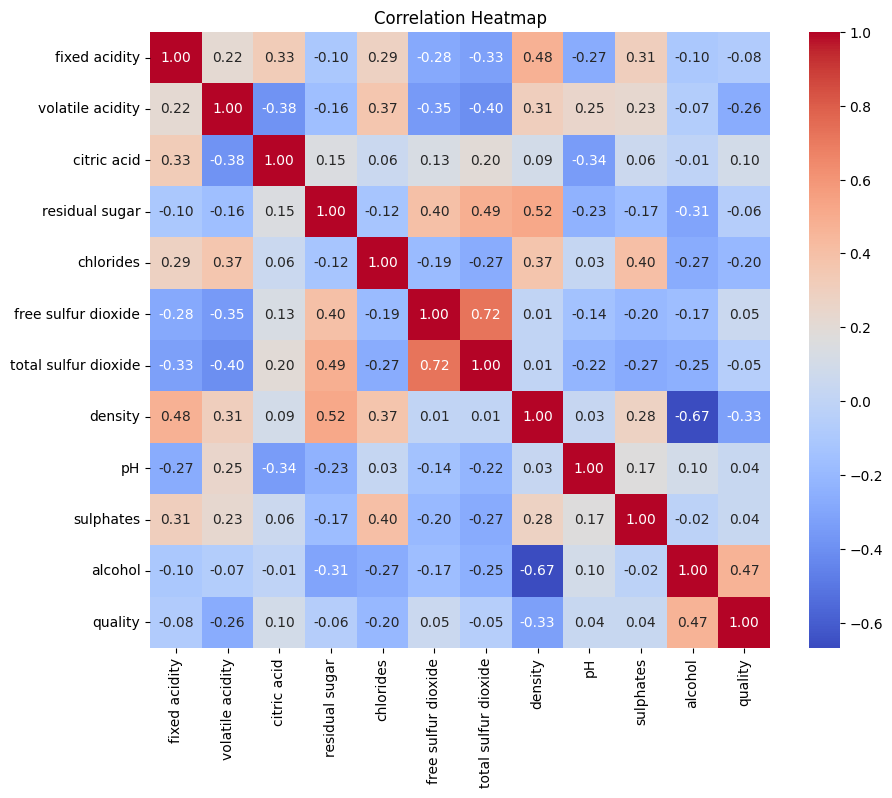

In [46]:
# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

1. find the number of times when the 'wine type' is 'red'

In [47]:
red_wine_count=data_cleaned1[data_cleaned1['type']=='red'].shape[0]
red_wine_count

1359

exp:-

This code calculates the count of red wine samples in the data_cleaned1 DataFrame.

2. find all the instance when 'quality' is above 7

In [48]:
high_quality_wines=data_cleaned1[data_cleaned1['quality']>7]
high_quality_wines

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
17    white       7.216573              0.66         0.48             1.2   
20    white       6.200000              0.66         0.48             1.2   
22    white       6.800000              0.26         0.42             1.7   
68    white       6.700000              0.23         0.31             2.1   
158   white       5.200000              0.44         0.04             1.4   
...     ...            ...               ...          ...             ...   
6100    red       8.600000              0.42         0.39             1.8   
6167    red       5.500000              0.49         0.03             1.8   
6301    red       7.200000              0.33         0.33             1.7   
6347    red       7.200000              0.38         0.31             2.0   
6447    red       7.400000              0.36         0.30             1.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
17        0.029                 29.0                  75.0  0.98920  3.33   
20        0.029                 29.0                  75.0  0.98920  3.33   
22        0.049                 41.0                 122.0  0.99300  3.47   
68        0.046                 30.0                  96.0  0.99260  3.33   
158       0.036                 43.0                 119.0  0.98940  3.36   
...         ...                  ...                   ...      ...   ...   
6100      0.068                  6.0                  12.0  0.99516  3.35   
6167      0.044                 28.0                  87.0  0.99080  3.50   
6301      0.061                  3.0                  13.0  0.99600  3.23   
6347      0.056                 15.0                  29.0  0.99472  3.23   
6447      0.074                 17.0                  24.0  0.99419  3.24   

      sulphates  alcohol  quality  
17         0.39     12.8        8  
20         0.39     12.8        8  
22         0.48     10.5        8  
68         0.64     10.7        8  
158        0.33     12.1        8  
...         ...      ...      ...  
6100       0.69     11.7        8  
6167       0.82     14.0        8  
6301       1.10     10.0        8  
6347       0.76     11.3        8  
6447       0.70     11.4        8  

[154 rows x 13 columns]

exp:-


high_quality_wines DataFrame contains only the rows of data_cleaned1 where the 'quality' column has a value greater than 7.

3. show all the records where wine type is 'white'

In [49]:
white_wines=data_cleaned1[data_cleaned1['type']=='white']
white_wines

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0          0.270000         0.36            20.7   
1     white            6.3          0.300000         0.34             1.6   
2     white            8.1          0.280000         0.40             6.9   
3     white            7.2          0.230000         0.32             8.5   
6     white            6.2          0.320000         0.16             7.0   
...     ...            ...               ...          ...             ...   
4893  white            6.2          0.210000         0.29             1.6   
4894  white            6.6          0.320000         0.36             8.0   
4895  white            6.5          0.344123         0.19             1.2   
4896  white            5.5          0.290000         0.30             1.1   
4897  white            6.0          0.210000         0.38             0.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
6         0.045                 30.0                 136.0  0.99490  3.18   
...         ...                  ...                   ...      ...   ...   
4893      0.039                 24.0                  92.0  0.99114  3.27   
4894      0.047                 57.0                 168.0  0.99490  3.15   
4895      0.041                 30.0                 111.0  0.99254  2.99   
4896      0.022                 20.0                 110.0  0.98869  3.34   
4897      0.020                 22.0                  98.0  0.98941  3.26   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
6          0.47      9.6        6  
...         ...      ...      ...  
4893       0.50     11.2        6  
4894       0.46      9.6        5  
4895       0.46      9.4        6  
4896       0.38     12.8        7  
4897       0.32     11.8        6  

[3970 rows x 13 columns]

exp:-

The resulting DataFrame white_wines contains only the rows where the 'type' column is 'white', effectively filtering out all other types of wine.

4. find all the instances 'quality' is above 7 or 'alchol' is above 14

In [50]:
filtered_wines=data_cleaned1[(data_cleaned1['quality']>7)|(data_cleaned1['alcohol']>14)]
filtered_wines

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
17    white       7.216573              0.66         0.48             1.2   
20    white       6.200000              0.66         0.48             1.2   
22    white       6.800000              0.26         0.42             1.7   
68    white       6.700000              0.23         0.31             2.1   
158   white       5.200000              0.44         0.04             1.4   
...     ...            ...               ...          ...             ...   
6100    red       8.600000              0.42         0.39             1.8   
6167    red       5.500000              0.49         0.03             1.8   
6301    red       7.200000              0.33         0.33             1.7   
6347    red       7.200000              0.38         0.31             2.0   
6447    red       7.400000              0.36         0.30             1.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
17        0.029                 29.0                  75.0  0.98920  3.33   
20        0.029                 29.0                  75.0  0.98920  3.33   
22        0.049                 41.0                 122.0  0.99300  3.47   
68        0.046                 30.0                  96.0  0.99260  3.33   
158       0.036                 43.0                 119.0  0.98940  3.36   
...         ...                  ...                   ...      ...   ...   
6100      0.068                  6.0                  12.0  0.99516  3.35   
6167      0.044                 28.0                  87.0  0.99080  3.50   
6301      0.061                  3.0                  13.0  0.99600  3.23   
6347      0.056                 15.0                  29.0  0.99472  3.23   
6447      0.074                 17.0                  24.0  0.99419  3.24   

      sulphates  alcohol  quality  
17         0.39     12.8        8  
20         0.39     12.8        8  
22         0.48     10.5        8  
68         0.64     10.7        8  
158        0.33     12.1        8  
...         ...      ...      ...  
6100       0.69     11.7        8  
6167       0.82     14.0        8  
6301       1.10     10.0        8  
6347       0.76     11.3        8  
6447       0.70     11.4        8  

[157 rows x 13 columns]

exp:-

This filters the data_cleaned1 DataFrame using the combined conditions, resulting in a DataFrame filtered_wines containing rows that meet at least one of the specified conditions.

5. what is the minimun and maximum value of each column against each 'wine types'?

In [51]:
min_max=data_cleaned1.groupby('type').agg(['min','max'])
min_max

fixed acidity       volatile acidity       citric acid        \
                min   max              min   max         min   max   
type                                                                 
red             4.6  15.9             0.12  1.58         0.0  1.00   
white           3.8  14.2             0.08  1.10         0.0  1.66   

      residual sugar       chlorides         ...  density             pH  \
                 min   max       min    max  ...      min      max   min   
type                                         ...                           
red              0.9  15.5     0.012  0.611  ...  0.99007  1.00369  2.74   
white            0.6  65.8     0.009  0.346  ...  0.98711  1.03898  2.72   

            sulphates       alcohol       quality      
        max       min   max     min   max     min max  
type                                                   
red    4.01      0.33  2.00     8.4  14.9       3   8  
white  3.82      0.22  1.08     8.0  14.2       3   9  

[2 rows x 24 columns]

exp:-

This applies the aggregation functions 'min' and 'max' to each group, calculating the minimum and maximum values for each column within each group.

6. How does the alcohol content of wine relate to its quality rating?

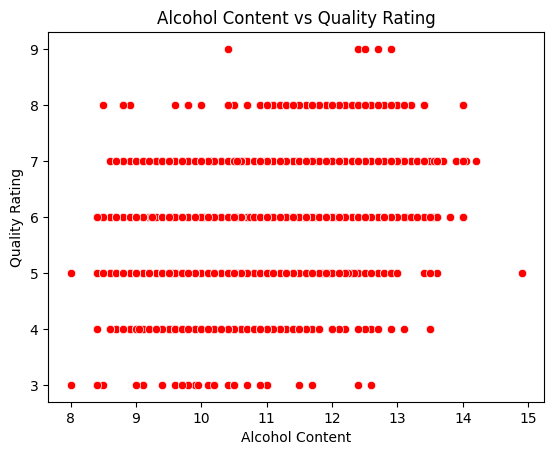

In [52]:
sns.scatterplot(data=data_cleaned1, x='alcohol', y='quality',color='red')
plt.title('Alcohol Content vs Quality Rating')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality Rating')
plt.show()

exp:-

the plot visually represents the relationship between 'alcohol' content and 'quality' rating, providing insight into any potential correlations or patterns between these two variables in the dataset.

7.
How do the pairwise relationships among selected chemical properties in the data_cleaned1 dataset appear when visualized with kernel density estimation plots?

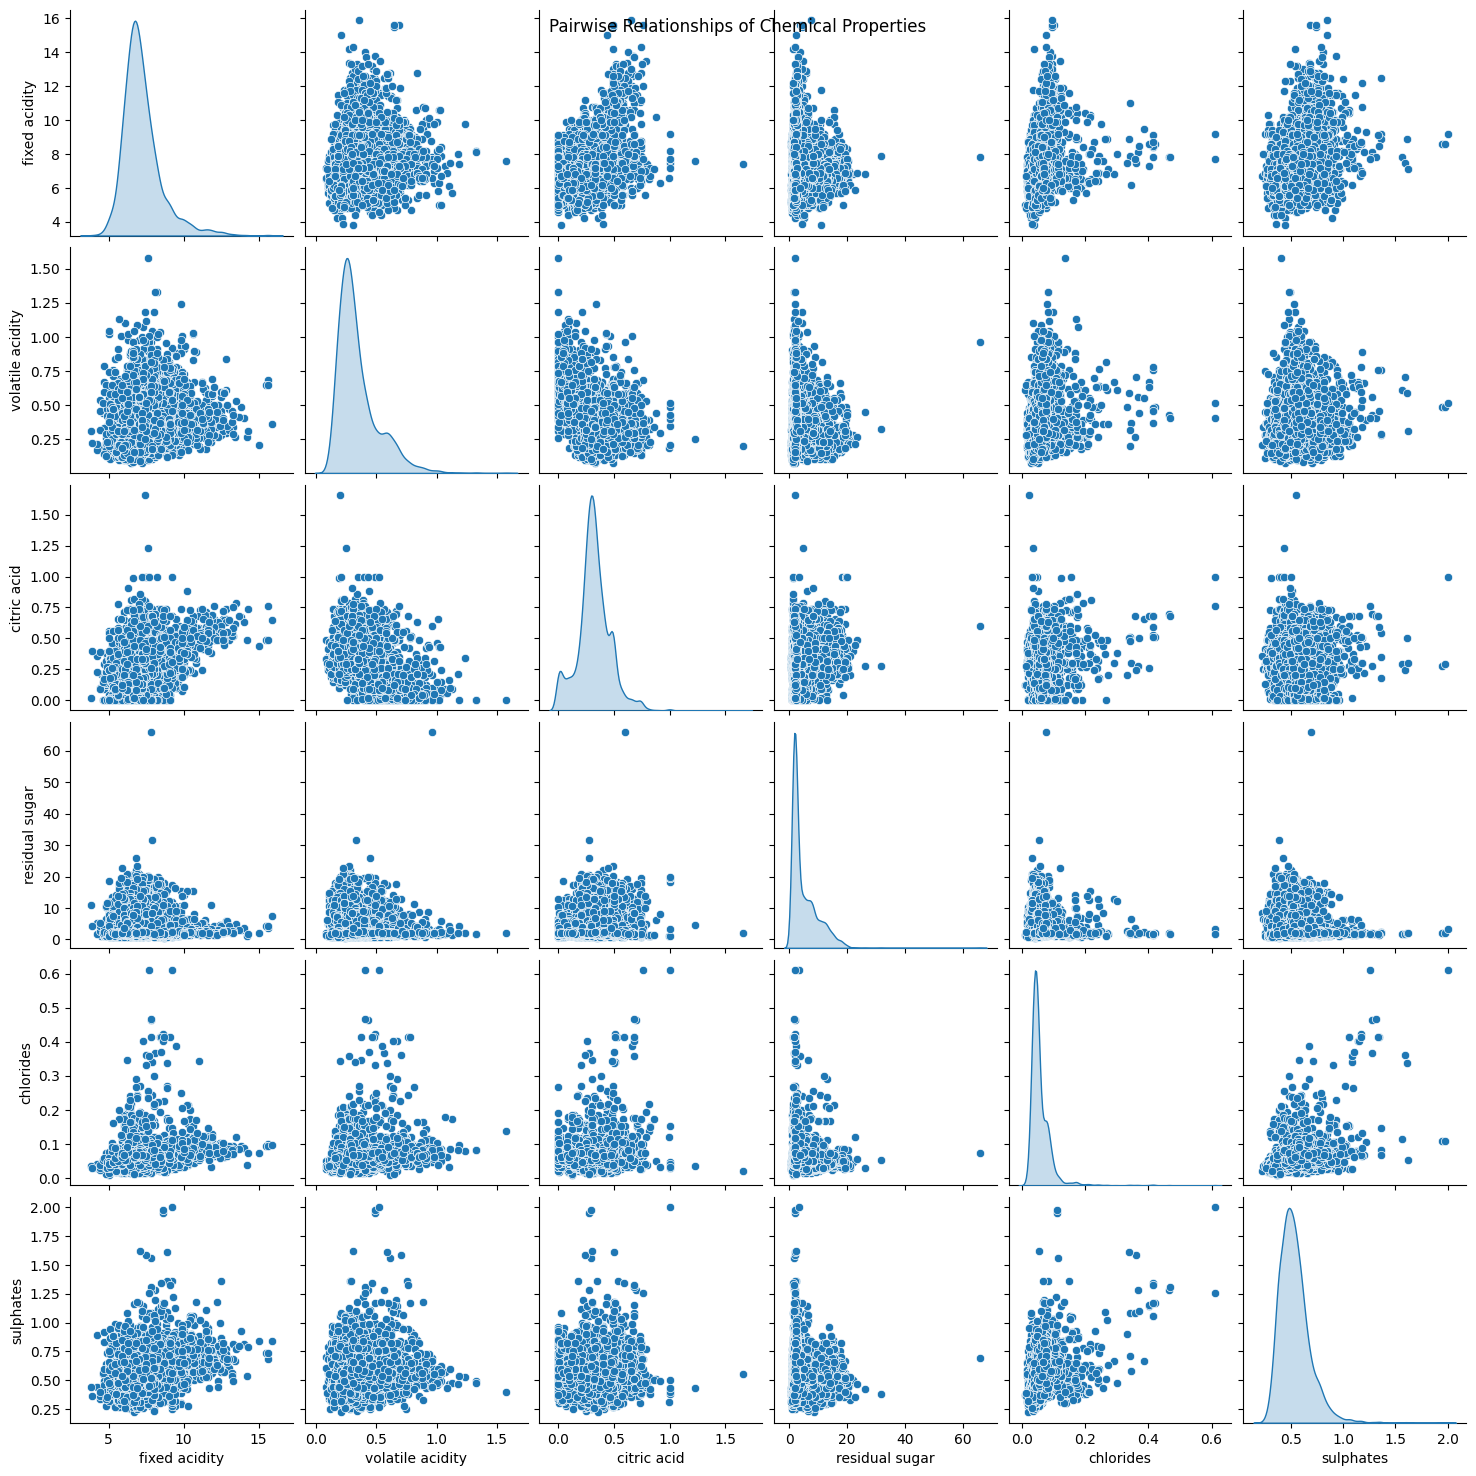

In [53]:
sns.pairplot(data=data_cleaned1[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'sulphates']], diag_kind='kde')
plt.suptitle('Pairwise Relationships of Chemical Properties')
plt.show()

exp:-

the code aims to visualize the pairwise relationships and distributions of the selected chemical properties in the dataset, with a focus on exploring potential patterns or correlations between them.

8.What is the distribution of red and white wines in the dataset, and how does the count of each type compare?

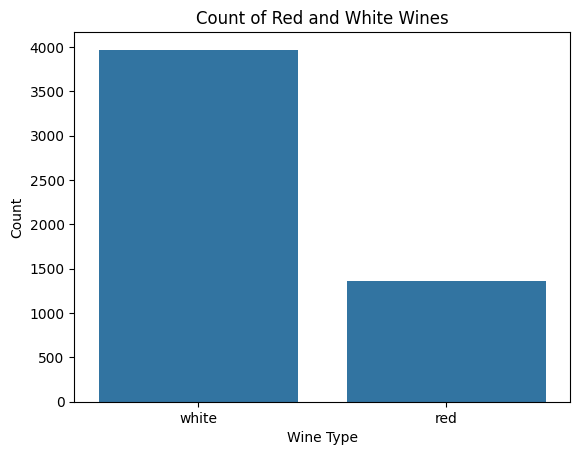

In [54]:
sns.countplot(data=data_cleaned1, x='type')
plt.title('Count of Red and White Wines')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.show()

exp:-

the code aims to visually represent the distribution of red and white wines in the dataset by plotting the count of each wine type. It provides a clear comparison of the counts of red and white wines, allowing for easy interpretation of their respective distributions.

9. What is the distribution of alcohol content across different quality levels of wine?

<ipython-input-55-e8732ccb9a00>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=data_cleaned1, palette='viridis')


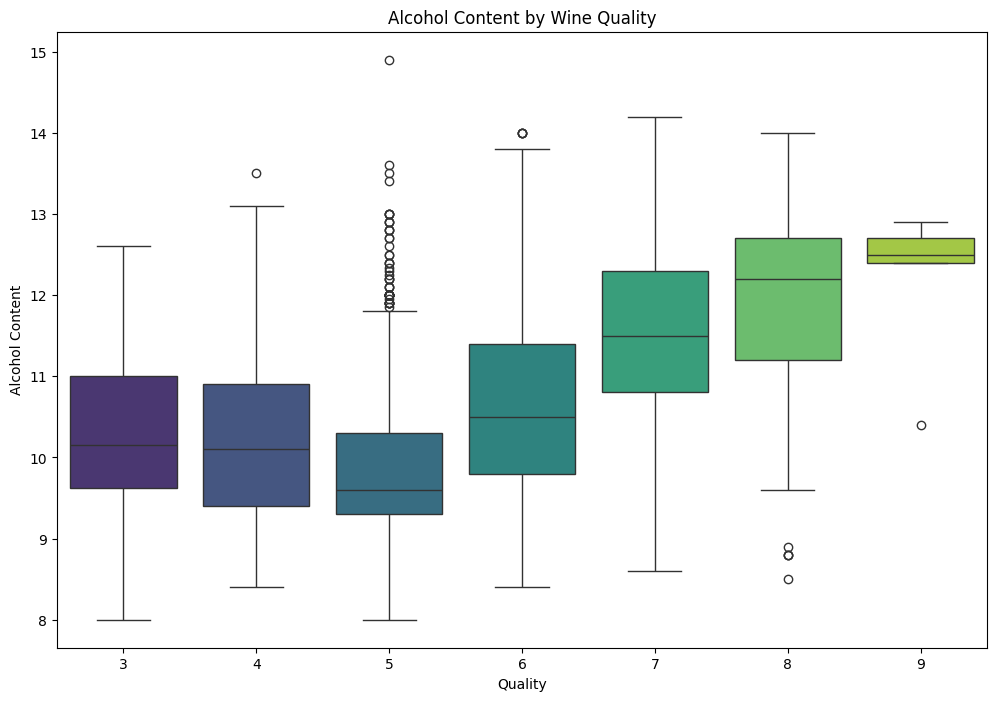

In [55]:
# Boxplot of some features by quality
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='alcohol', data=data_cleaned1, palette='viridis')
plt.title('Alcohol Content by Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Alcohol Content')
plt.show()

exp:-

 this code allows us to visually examine how alcohol content varies across different quality levels of wine using a boxplot, providing insights into potential relationships between wine quality and alcohol content.

10. How does the distribution of pH vary across different quality levels of wine, depicted through a violin plot?

<ipython-input-56-b51edea03ca5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_cleaned1,x='quality', y='pH',palette='colorblind')


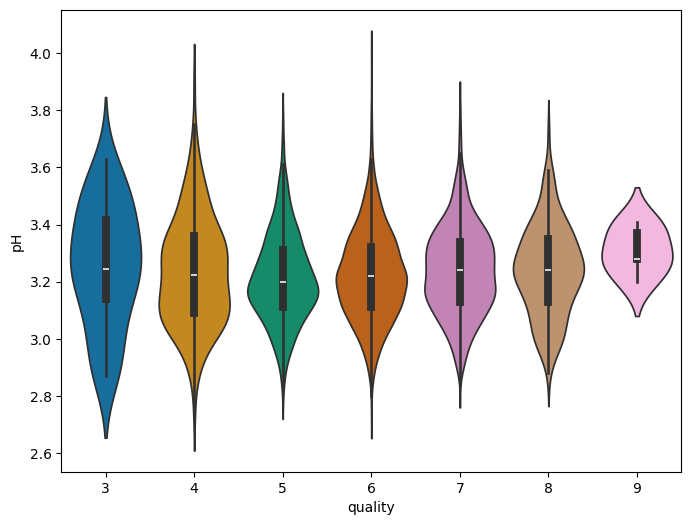

In [56]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=data_cleaned1,x='quality', y='pH',palette='colorblind')
plt.show()

exp:-

Violin plots are useful for showing the distribution of a continuous variable (in this case, pH) within different categories (quality levels of wine). They combine aspects of box plots and kernel density plots, providing insights into both central tendency and variability of the data at each quality level

11. "What is the relationship between the quality of wines and the level of citric acid content, as depicted by the bar plot"?

<ipython-input-57-41936bc9c940>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data_cleaned1, x='quality', y='citric acid',palette='coolwarm')


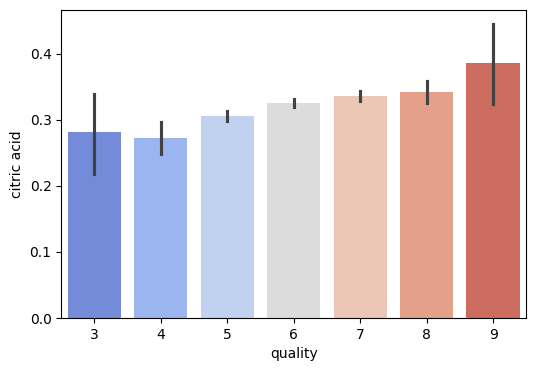

In [57]:
plt.figure(figsize=(6, 4))
sns.barplot(data=data_cleaned1, x='quality', y='citric acid',palette='coolwarm')
plt.show()

exp:-

Bar plots are commonly used to display the mean or average values of a numerical variable within different categories. In this case, the bar plot visualizes how the average citric acid content varies across different quality levels of wine, providing insights into potential relationships between wine quality and citric acid content.

12. "What are the distributions of various wine attributes,for each feature in the dataset, depict using data visualization?

<Figure size 1000x600 with 0 Axes>

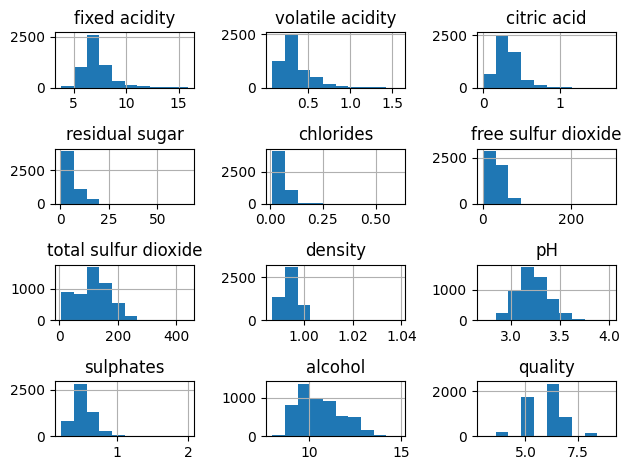

In [58]:
plt.figure(figsize=(10, 6))
data_cleaned1.hist()
plt.tight_layout()   #automatically adjusts the subplots parameter
plt.show()

exp:-

Histograms are useful for visualizing the distribution of a single variable. Each histogram in this plot shows the frequency distribution of values within a specific column, providing insights into the data's distribution and potential outliers.

13. How does the quality of wine relate to its volatile acidity level?

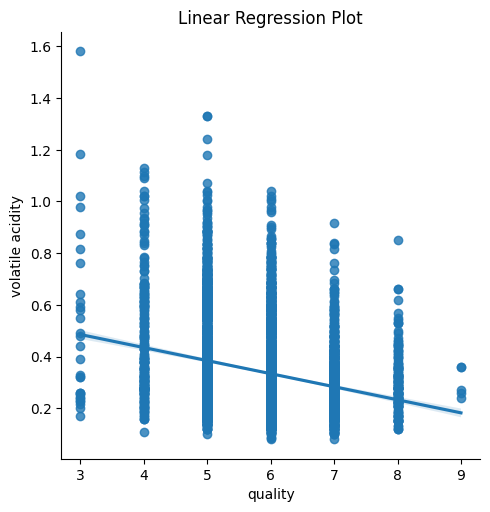

In [59]:
sns.lmplot(y='volatile acidity',x='quality', data=data_cleaned1)
plt.title('Linear Regression Plot')
plt.show()

exp:-

The linear regression line helps visualize the overall trend or relationship between wine quality and volatile acidity. It shows whether there's a positive or negative correlation between the two variables and how strong the relationship is.

14. How does the distribution of total sulfur dioxide content vary across different quality levels of wine?

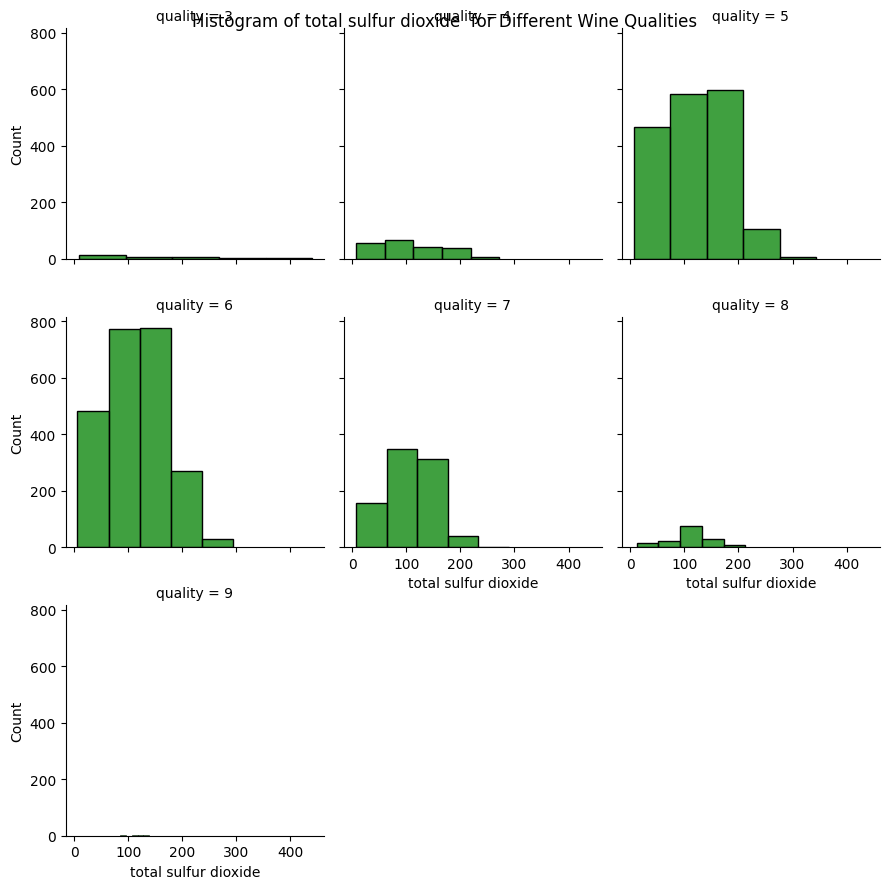

In [60]:
g = sns.FacetGrid(data_cleaned1, col='quality', col_wrap=3)
g.map(sns.histplot, 'total sulfur dioxide', bins=5, color='green')
plt.suptitle('Histogram of total sulfur dioxide  for Different Wine Qualities')
plt.show()

exp:-

This code allows us to examine how the distribution of 'total sulfur dioxide' varies across different quality levels of wine, with each quality level having its own histogram subplot in the grid.

15. What is the distribution of sulphates content across different quality levels of wine, visualized using a stripplot?

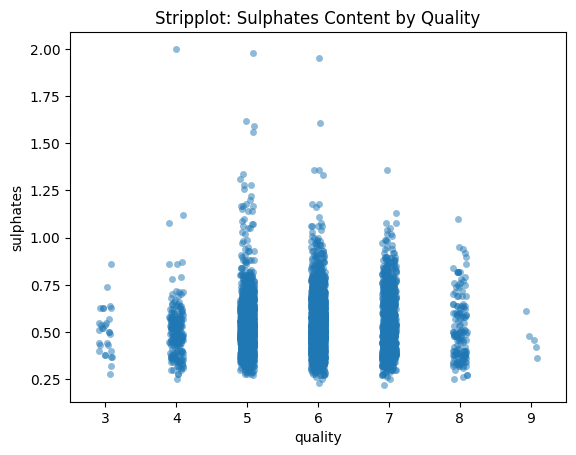

In [61]:
sns.stripplot(x='quality', y='sulphates', data=data_cleaned1, jitter=True, alpha=0.5)
plt.title('Stripplot: Sulphates Content by Quality')
plt.show()

exp:-

Strip plots are useful for visualizing the distribution of a continuous variable (sulphates content in this case) within different categories (quality levels of wine). Each data point represents an observation in the dataset, and their position along the categorical axis provides insights into the distribution of sulphates content across different quality levels. The jittering helps to prevent overcrowding of points and allows for better visualization of the distribution.

16. What is the variation in alcohol content across different quality levels of wine, visualized using a boxen plot?

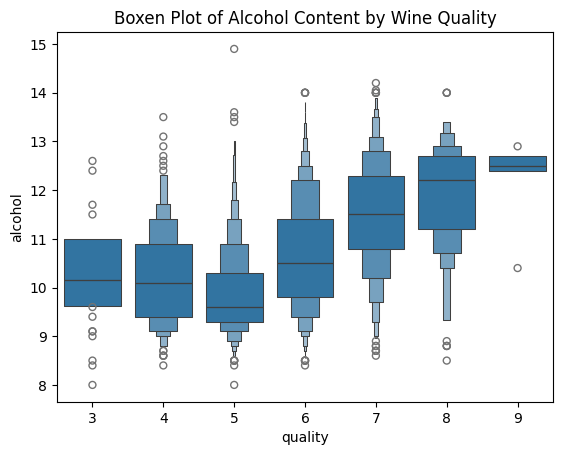

In [62]:
sns.boxenplot(x='quality', y='alcohol', data=data_cleaned1)
plt.title('Boxen Plot of Alcohol Content by Wine Quality')
plt.show()

exp:-

Boxen plots are similar to box plots but can provide more detailed information about the distribution, especially in the tails of the distribution. They are particularly useful when dealing with large datasets or when there is significant variation in the data. In this case, the boxen plot allows us to examine how the distribution of alcohol content varies across different quality levels of wine.

17. How does the average alcohol content vary across different quality levels of wine, as depicted by a point plot?

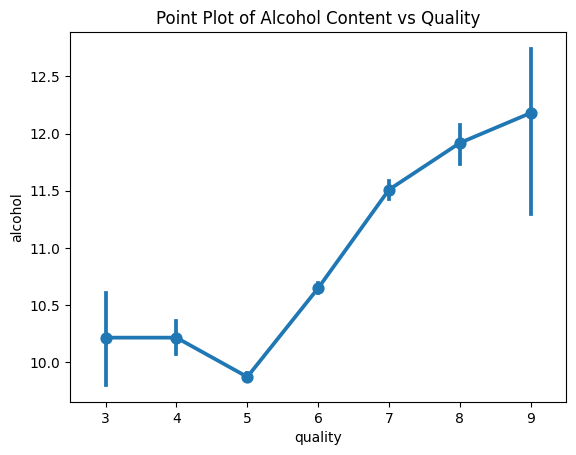

In [63]:
sns.pointplot(x='quality', y='alcohol', data=data_cleaned1)
plt.title('Point Plot of Alcohol Content vs Quality')
plt.show()

exp:-

Point plots are useful for showing central tendency and variability of the data. In this case, the point plot allows us to visually inspect the average alcohol content for each quality level of wine, as well as any potential trends or patterns in the relationship between alcohol content and wine quality.

18. What is the kernel density estimate of the distribution of alcohol content in the wine dataset, and how is it visualized using a shaded KDE plot?

<ipython-input-64-fecc32d5ab6d>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_cleaned1['alcohol'], shade=True)


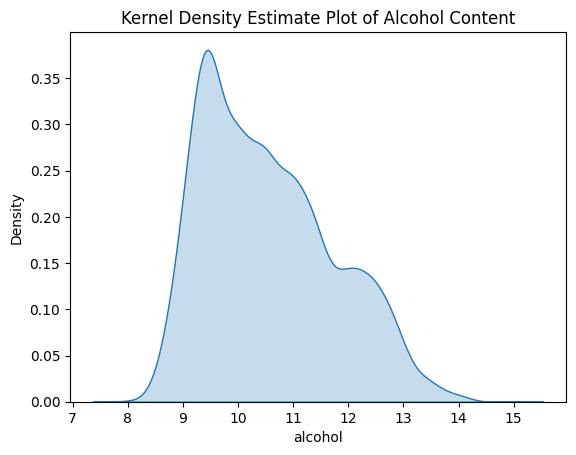

In [64]:
sns.kdeplot(data=data_cleaned1['alcohol'], shade=True)
plt.title('Kernel Density Estimate Plot of Alcohol Content')
plt.show()

exp:-

KDE plots are useful for visualizing the probability density function of a continuous variable. In this case, the KDE plot allows us to understand the distribution of alcohol content in the dataset, including the shape of the distribution and any peaks or clusters present in the data. The shading under the KDE curve helps to emphasize the density of the data at different alcohol content values.

19. How does the pH level of wine vary across different quality levels, as depicted in a line plot?

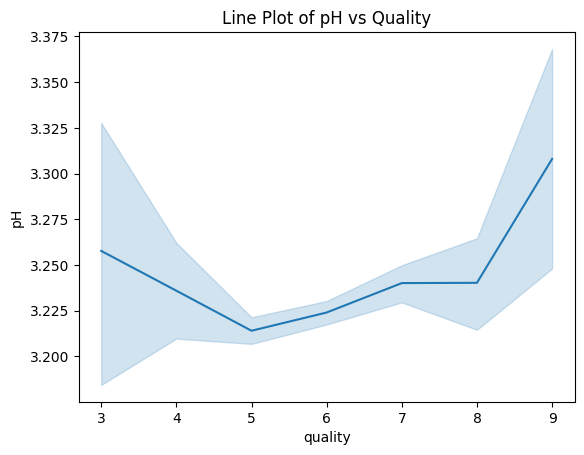

In [65]:
sns.lineplot(x='quality', y='pH', data=data_cleaned1)
plt.title('Line Plot of pH vs Quality')
plt.show()

exp:-

Line plots are useful for showing trends or relationships between two continuous variables. In this case, the line plot allows us to observe how the pH values change across different quality levels of wine. The line connects the mean pH value for each quality level, providing insights into any overall trends or patterns in the relationship between pH and wine quality.

20. How does the density of wine samples vary across different combinations of pH and alcohol content?

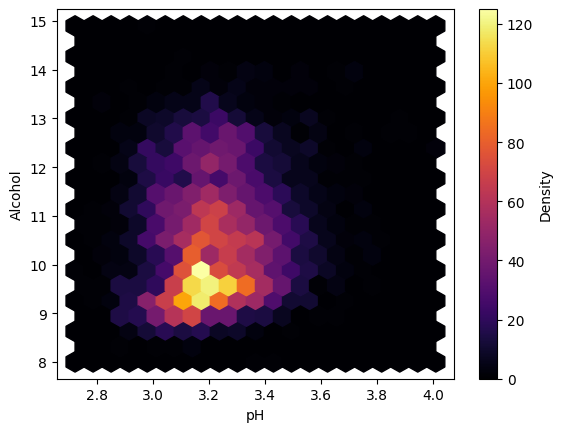

In [66]:
plt.hexbin( data=data_cleaned1,x='pH', y='alcohol', gridsize=20, cmap='inferno')
plt.colorbar(label='Density')
plt.xlabel('pH')
plt.ylabel('Alcohol')
plt.show()

exp:-

Hexbin plots are useful for visualizing the density of points in a scatter plot when dealing with a large number of data points. In this case, the hexbin plot allows us to observe the distribution and density of pH-alcohol content pairs in the dataset, with each hexagon representing a group of data points. The colormap indicates the density of points within each hexagon, with warmer colors representing higher densities.It allows you to see how two variables (pH and alcohol content) affect a third variable (density)

----> to know which type of wine's quality is good in the given dataset

In [67]:
# Group the data by wine type
grouped_data = data_cleaned1.groupby('type')

# Calculate the average quality for each wine type
average_quality = grouped_data['quality'].mean()

# Print the average quality for each wine type
print("Average Quality by Wine Type:")
print(average_quality)

Average Quality by Wine Type:
type
red      5.623252
white    5.855164
Name: quality, dtype: float64


-----> to know how much amount of parameters we should add so that it becomes a good quality wine.

In [68]:
# Filter wines labeled as "good quality" (for example, quality >= 7)
good_quality_wines = data_cleaned1[data_cleaned1['quality'] >= 7]

# Calculate the mean values of each feature for good quality wines
mean_values = good_quality_wines[['fixed acidity', 'volatile acidity', 'citric acid',
                                  'residual sugar', 'chlorides', 'free sulfur dioxide',
                                  'total sulfur dioxide', 'density', 'pH', 'sulphates',
                                  'alcohol', 'quality']].mean()

# Print the mean values
print("Mean Feature Values for Good Quality Wines:")
print(mean_values)

Mean Feature Values for Good Quality Wines:
fixed acidity             7.079690
volatile acidity          0.294365
citric acid               0.337092
residual sugar            4.256878
chlorides                 0.044407
free sulfur dioxide      30.494560
total sulfur dioxide    106.286845
density                   0.992725
pH                        3.240404
sulphates                 0.544649
alcohol                  11.572733
quality                   7.157270
dtype: float64


-----> to know how much amount of parameters we should add so that it becomes a good white wine.

In [69]:
# Filter the dataset to include only white wines
white_wine_data = data_cleaned1[data_cleaned1['type'] == 'white']

# Define the threshold for "good" quality rating
quality_threshold = 7

# Select white wines with quality ratings above the threshold
good_white_wines = white_wine_data[white_wine_data['quality'] > quality_threshold]

# Calculate the average feature values for good white wines
average_features = good_white_wines[['fixed acidity', 'volatile acidity', 'citric acid',
                                     'residual sugar', 'chlorides', 'free sulfur dioxide',
                                     'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].mean()

# # Sum the average feature values
# total_amount = average_features.sum()

print("Total amount of selected features for good white wines:")
print(average_features)

Total amount of selected features for good white wines:
fixed acidity             6.643917
volatile acidity          0.289927
citric acid               0.337956
residual sugar            4.994161
chlorides                 0.036358
free sulfur dioxide      35.489051
total sulfur dioxide    121.470803
density                   0.991716
pH                        3.238467
sulphates                 0.484453
alcohol                  11.897810
dtype: float64


-----> to know how much amount of parameters we should add so that it becomes a good red wine.

In [70]:
# Filter the dataset to include only red wines
red_wine_data = data_cleaned1[data_cleaned1['type'] == 'red']

# Define the threshold for "good" quality rating
quality_threshold = 7

# Select red wines with quality ratings above the threshold
good_red_wines = red_wine_data[red_wine_data['quality'] > quality_threshold]

# Calculate the average feature values for good red wines
average_features = good_red_wines[['fixed acidity', 'volatile acidity', 'citric acid',
                                     'residual sugar', 'chlorides', 'free sulfur dioxide',
                                     'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].mean()

# # Sum the average feature values
# total_amount = average_features.sum()

print("Total amount of selected features for good red wines:")
print(average_features)

Total amount of selected features for good red wines:
fixed acidity            8.441176
volatile acidity         0.427647
citric acid              0.382941
residual sugar           2.576471
chlorides                0.068353
free sulfur dioxide     13.764706
total sulfur dioxide    34.470588
density                  0.995095
pH                       3.274118
sulphates                0.774706
alcohol                 12.158824
dtype: float64
